In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATA

In [3]:
df = pd.read_csv("lending_club_loan_dataset.csv")

In [4]:
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

DATA CLEANING

In [6]:
df.drop(["last_major_derog_none"],axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      18509 non-null  object 
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


In [8]:
df["home_ownership"].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
Name: home_ownership, dtype: int64

In [9]:
df.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [10]:
df['home_ownership'] = df['home_ownership'].fillna('MORTGAGE')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


In [13]:
np.mean(df["dti"])

16.58784137861536

In [14]:
df['dti'] = df['dti'].fillna(16)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   dti                 20000 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


EXPLORATORY DATA ANALYSIS

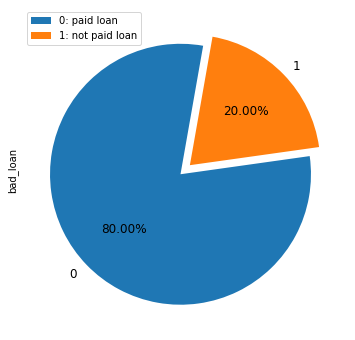

In [17]:
df.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);


(array([0, 1, 2]),
 [Text(0, 0, 'RENT'), Text(1, 0, 'OWN'), Text(2, 0, 'MORTGAGE')])

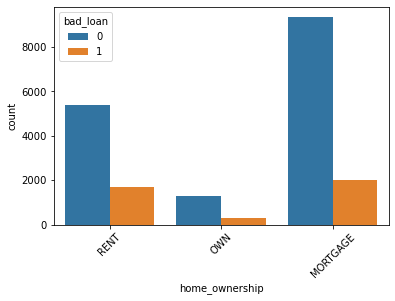

In [18]:
sns.countplot(df["home_ownership"], hue = df["bad_loan"])
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'medical'),
  Text(3, 0, 'other'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'vacation'),
  Text(8, 0, 'car'),
  Text(9, 0, 'house'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'wedding')])

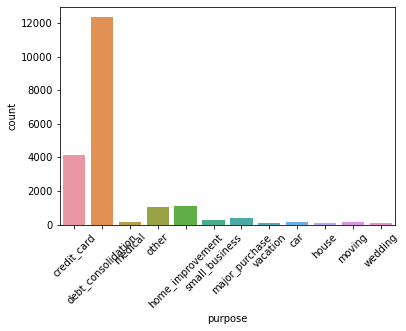

In [19]:
sns.countplot(df["purpose"])
plt.xticks(rotation=45)
#from the graph as we can see for debt consolidation loan has taken in maximum times 

In [20]:
df['term'] = df['term'].apply(lambda x: x.lower())

(array([0, 1]), [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

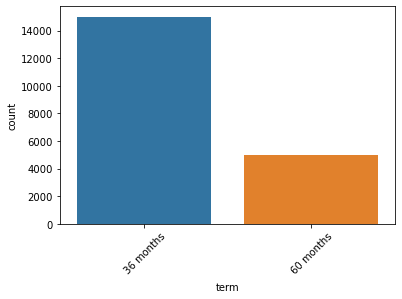

In [21]:
sns.countplot(df["term"])
plt.xticks(rotation=45)
#mostly people prefer for duration of 36 months

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

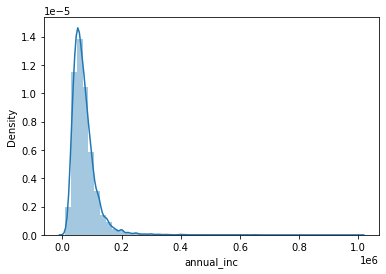

In [22]:
sns.distplot(df["annual_inc"])
#annual income of the data is right skewed

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'D'),
  Text(2, 0, 'E'),
  Text(3, 0, 'B'),
  Text(4, 0, 'G'),
  Text(5, 0, 'C'),
  Text(6, 0, 'F')])

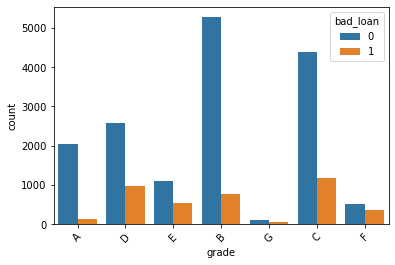

In [23]:
sns.countplot(df["grade"], hue = df["bad_loan"])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

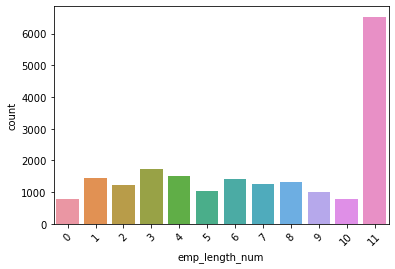

In [25]:
sns.countplot(df["emp_length_num"])
plt.xticks(rotation=45)
# number of peoples who have 10 yrs or more than 10 yrs employmnet has take loan

<AxesSubplot:xlabel='annual_inc', ylabel='grade'>

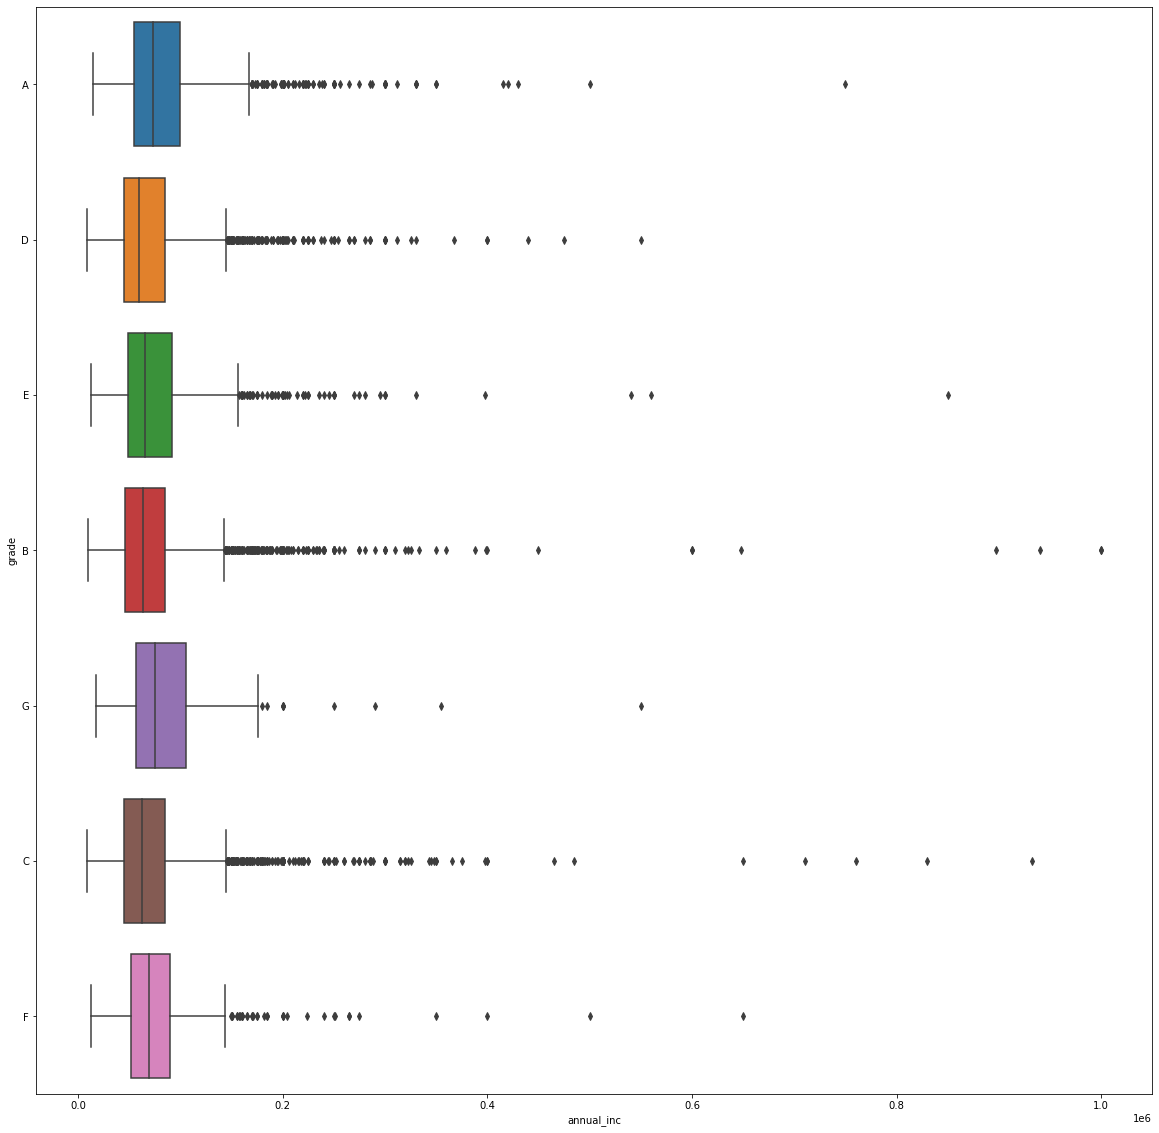

In [26]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df["annual_inc"],y = df['grade'])
# there is some maximum annual income of some peoples as seen from outliers

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

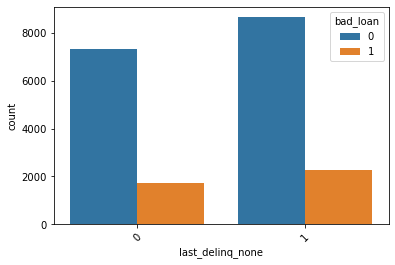

In [27]:
sns.countplot(df["last_delinq_none"], hue = df["bad_loan"])
plt.xticks(rotation=45)
# their is count of deliquency in data is more than non deliquency